In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
sample_train=['You are so sexy','Wanna do something?','I will call 911','Its done between us']

In [3]:
count_vec=CountVectorizer()
count_vec.fit(sample_train)

CountVectorizer()

In [4]:
count_vec.get_feature_names()

['911',
 'are',
 'between',
 'call',
 'do',
 'done',
 'its',
 'sexy',
 'so',
 'something',
 'us',
 'wanna',
 'will',
 'you']

In [5]:
sample_train_vec=count_vec.transform(sample_train)

In [6]:
type(sample_train_vec)

scipy.sparse.csr.csr_matrix

In [7]:
sample_train_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [8]:
import pandas as pd
df=pd.DataFrame(sample_train,columns=['Sentence'])

In [9]:
df2=pd.DataFrame(sample_train_vec.toarray(),columns=count_vec.get_feature_names())

In [10]:
df2['Sentence']=sample_train

In [11]:
df2

,911,are,between,call,do,done,its,sexy,so,something,us,wanna,will,you,Sentence
0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,You are so sexy
1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,Wanna do something?
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,I will call 911
3,0,0,1,0,0,1,1,0,0,0,1,0,0,0,Its done between us


In [12]:
sample_test=['Its something sexy between us']
sample_test_vec=count_vec.transform(sample_test)
pd.DataFrame(sample_test_vec.toarray(),columns=count_vec.get_feature_names())

,911,are,between,call,do,done,its,sexy,so,something,us,wanna,will,you
0,0,0,1,0,0,0,1,1,0,1,1,0,0,0


In [13]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [14]:
sms=data.dropna(axis=1)

In [15]:
sms.columns=['Label','Message']

In [16]:
sms

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# EDA

In [17]:
sms.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
sms['LabelNum']=[1 if spam=='spam' else 0 for spam in sms['Label'].values]

<ipython-input-18-6a5ce38a0642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['LabelNum']=[1 if spam=='spam' else 0 for spam in sms['Label'].values]


In [19]:
sms

,Label,Message,LabelNum
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [20]:
sms['MessageLen']=sms.Message.apply(len)

<ipython-input-20-2ab14e461a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['MessageLen']=sms.Message.apply(len)


In [21]:
sms.head()

,Label,Message,LabelNum,MessageLen
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [22]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(14.407569444444448, 0.5, 'Frequency')

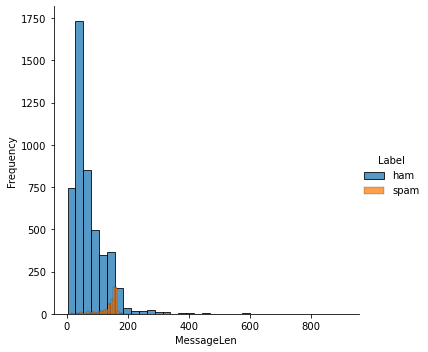

In [23]:
sb.FacetGrid(sms,hue='Label',height=5).map(sb.histplot,'MessageLen',bins=35).add_legend()
plt.ylabel('Frequency')

* Short length message are mostly ham and they are large in number
* Spam message are tend to be long in length and they are small in number

In [24]:
sms[sms.Label=='ham'].describe()

,LabelNum,MessageLen
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [25]:
sms[sms.Label=='spam'].describe()

,LabelNum,MessageLen
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [26]:
sms[sms.MessageLen==910].iloc[0].Message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Adding a feature that whether a message contains urls or not

In [27]:
import re
def checkurl(text):
    if re.search('http\S',text):
            return 1
    return 0

In [28]:
Urls=[]
for text in sms['Message'].values:
    Urls.append(checkurl(text))
sms['Urls']=Urls
sms

,Label,Message,LabelNum,MessageLen,Urls
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,0
3,ham,U dun say so early hor... U c already then say...,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,0
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,0
5570,ham,The guy did some bitching but I acted like i'd...,0,125,0


In [29]:
sms['Urls'].value_counts()

0    5551
1      21
Name: Urls, dtype: int64

In [30]:
(sms[sms.Urls==1].Label=='spam').count()

21

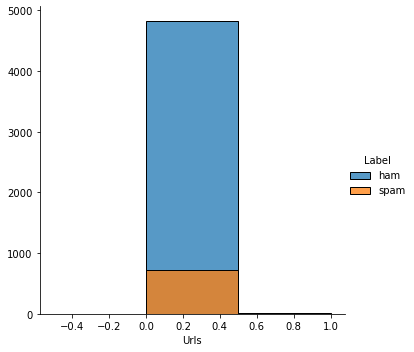

In [31]:
sb.FacetGrid(sms,hue='Label',height=5).map(sb.histplot,'Urls',bins=2).add_legend()

Every message that contains Url is basically spam

# Text Preprocessing

## Dropping rows with urls

In [32]:
sms=sms[sms['Urls']==0]
sms.shape

(5551, 5)

In [33]:
sms=sms.reset_index(drop=True)

In [34]:
sms=sms.drop('Urls',axis=1)
sms

,Label,Message,LabelNum,MessageLen
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5546,spam,This is the 2nd time we have tried 2 contact u...,1,161
5547,ham,Will Ì_ b going to esplanade fr home?,0,37
5548,ham,"Pity, * was in mood for that. So...any other s...",0,57
5549,ham,The guy did some bitching but I acted like i'd...,0,125


# Removing stopwords,punctuation,alphanumeric

In [35]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop=list(stopwords.words('english'))+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

In [36]:
def remove_stopwords(sentence):
    words=[]
    for word in sentence.split():
        if word.lower() not in stop:
            words.append(word)
        else:
            pass
    return ' '.join(words)
def remove_punc(sentence):
    return re.sub(r'[^A-Za-z0-9]+',' ',sentence)
def remove_html(sentence):
    return re.sub(re.compile('<.*?>'),' ',sentence)
def remove_alphanum(sentence):
    return re.sub('\S*\d\S*','',sentence).strip()

def text_preprocess(text):
    text=remove_html(text)
    text=remove_punc(text)
    text=remove_alphanum(text)
    return remove_stopwords(text)

In [37]:
sms['CleanedMess']=sms.Message.apply(text_preprocess)
sms

,Label,Message,LabelNum,MessageLen,CleanedMess
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts May...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
...,...,...,...,...,...
5546,spam,This is the 2nd time we have tried 2 contact u...,1,161,time tried contact Pound prize claim easy call...
5547,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home
5548,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood suggestions
5549,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


Counting most common words in ham and spam

In [38]:
# for ham
words = sms[sms.Label=='ham'].CleanedMess.apply(lambda x: [word.lower() for word in x.split()])

In [39]:
words.shape

(4825,)

In [40]:
from collections import Counter
ham_words=Counter()
for msg in words:
    ham_words.update(msg)
print(ham_words.most_common(50))

[('gt', 318), ('lt', 316), ('get', 305), ('ok', 287), ('go', 249), ('know', 236), ('call', 236), ('good', 233), ('got', 232), ('like', 232), ('come', 227), ('day', 211), ('time', 201), ('love', 199), ('going', 169), ('one', 167), ('home', 165), ('want', 164), ('lor', 162), ('need', 158), ('sorry', 157), ('da', 150), ('still', 150), ('k', 145), ('n', 143), ('today', 139), ('see', 139), ('later', 135), ('r', 132), ('back', 130), ('send', 129), ('think', 128), ('take', 125), ('pls', 123), ('tell', 122), ('hi', 122), ('much', 115), ('well', 114), ('oh', 113), ('hope', 109), ('night', 109), ('hey', 107), ('wat', 106), ('happy', 106), ('dear', 106), ('great', 104), ('way', 101), ('work', 97), ('give', 93), ('say', 92)]


In [42]:
# for spam
words=sms[sms.Label=='spam'].CleanedMess.apply(lambda x:[word.lower() for word in x.split()])
spam_words=Counter()
for msg in words:
    spam_words.update(msg)
print(spam_words.most_common(50))

[('call', 355), ('free', 222), ('txt', 159), ('mobile', 127), ('text', 124), ('stop', 117), ('claim', 109), ('reply', 104), ('prize', 93), ('www', 86), ('get', 85), ('cash', 75), ('send', 69), ('new', 69), ('uk', 68), ('nokia', 66), ('win', 63), ('urgent', 62), ('week', 60), ('tone', 60), ('service', 56), ('contact', 56), ('c', 55), ('msg', 53), ('please', 52), ('guaranteed', 50), ('customer', 49), ('co', 48), ('per', 46), ('chat', 44), ('phone', 44), ('min', 43), ('com', 41), ('cs', 40), ('draw', 39), ('awarded', 38), ('mins', 36), ('latest', 35), ('camera', 35), ('line', 35), ('sms', 34), ('receive', 33), ('holiday', 32), ('landline', 32), ('video', 32), ('every', 32), ('cost', 31), ('shows', 31), ('wk', 31), ('rate', 30)]


# Vectorizing the cleaned message

In [43]:
# Splitting data into training and test
from sklearn.model_selection import train_test_split
[X_train,X_test,Y_train,Y_test]=train_test_split(sms.CleanedMess,sms.Label,random_state=1)

In [44]:
X_train.shape,X_test.shape

((4163,), (1388,))

## BOW and TfIdf

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
countvect=CountVectorizer()
countvect.fit(X_train)
X_train_dtm=countvect.transform(X_train)
X_train_dtm

<4163x6380 sparse matrix of type '<class 'numpy.int64'>'
	with 32554 stored elements in Compressed Sparse Row format>

In [51]:
X_test_dtm=countvect.transform(X_test)
X_test_dtm

<1388x6380 sparse matrix of type '<class 'numpy.int64'>'
	with 9581 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidftrans=TfidfTransformer()
tfidftrans.fit(X_train_dtm)
tfidftrans.transform(X_train_dtm)

<4163x6380 sparse matrix of type '<class 'numpy.float64'>'
	with 32554 stored elements in Compressed Sparse Row format>